In [25]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
df = pd.read_csv(r"C:\Users\sharm\Downloads\swiggy.csv")

In [27]:
df.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [28]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [29]:
df.shape

(8680, 10)

In [30]:
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

In [31]:
df.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [32]:
df.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


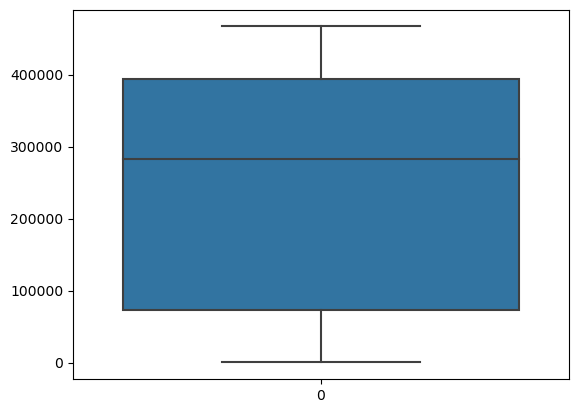

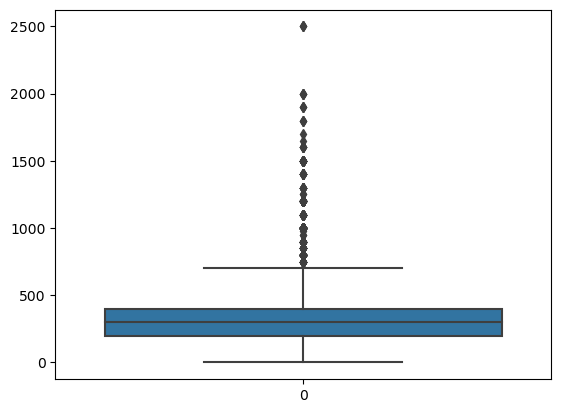

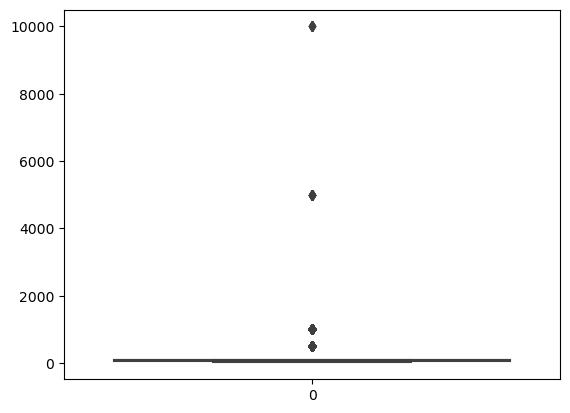

In [33]:
import matplotlib.pyplot as plt
cont_var = ['ID','Price','Total ratings',]
i = 1
for x in cont_var:
 plt.figure(i)
 sns.boxplot(df[x])
 i += 1

In [34]:
def treat_outlier(var1):
 
 IQR = df[var1].quantile(0.75) - df[var1].quantile(0.25)
 lower_val = df[var1].quantile(0.25) - (IQR * 1.5)
 upper_val = df[var1].quantile(0.75) + (IQR * 1.5)
 df.loc[df[var1] >= upper_val, var1] = upper_val
 df.loc[df[var1] <= lower_val, var1] = lower_val
 
variables = ['ID','Price','Total ratings']
for var1 in variables:
 treat_outlier(var1)

In [35]:
for x in df:
 print('***************',x,'****************')
 print(df[x].value_counts())
 print('**************************************')

*************** ID ****************
211.0       1
441413.0    1
441787.0    1
441784.0    1
441777.0    1
           ..
289953.0    1
289868.0    1
289697.0    1
289696.0    1
466488.0    1
Name: ID, Length: 8680, dtype: int64
**************************************
*************** Area ****************
Rohini                    257
Chembur                   208
Kothrud                   149
Andheri East              135
Navrangpura               132
                         ... 
Shakurpur                   1
Magob                       1
Bosepukur                   1
Ambegaon                    1
Panjarapole Cross Road      1
Name: Area, Length: 833, dtype: int64
**************************************
*************** City ****************
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: City, dtype: int64
**************************************
*************** Restauran

In [36]:
df.head(1)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211.0,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59


In [65]:
cat_var = ['Area','City','Restaurant','Food type','Address']

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in cat_var:
    df[var] = le.fit_transform(df[var])

In [67]:
df.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211.0,353,1,6719,300.0,4.4,100,518,44,59
1,221.0,353,1,7420,300.0,4.1,100,2500,44,56
2,246.0,292,1,3606,650.0,4.4,100,751,485,50
3,248.0,272,1,4751,250.0,3.9,175,2953,56,57
4,249.0,272,1,4782,350.0,4.0,50,3258,56,63


In [68]:
X = df.drop(['Delivery time'], axis = 1)

In [69]:
Y = df['Delivery time']

In [70]:
from sklearn.preprocessing import StandardScaler
min_max = StandardScaler()
X_transform = min_max.fit_transform(X)
X = pd.DataFrame(X_transform, columns = X.columns)

In [71]:
X_transform

array([[-1.5416441 , -0.11038892, -1.29050988, ...,  0.41922906,
        -1.24666964, -1.57834772],
       [-1.54158107, -0.11038892, -1.29050988, ...,  0.41922906,
         0.65266137, -1.57834772],
       [-1.54142351, -0.36323965, -1.29050988, ...,  0.41922906,
        -1.02338805, -0.93984382],
       ...,
       [ 1.39327164,  0.88443364, -0.45234715, ..., -0.04944573,
        -0.67552873,  1.00028141],
       [ 1.39401535,  0.88443364, -0.45234715, ..., -0.04944573,
         1.008187  ,  1.00028141],
       [ 1.39715409,  0.40360274, -1.70959124, ..., -0.04944573,
        -1.04159556,  0.06351945]])

In [72]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(X, Y, random_state=42, test_size =0.2)

In [73]:
print('Training data X :',train_x.shape)
print('Training data y: ',train_y.shape)

Training data X : (6944, 9)
Training data y:  (6944,)


In [74]:
print('Testing data X :',test_x.shape)
print('Testing data y: ',test_y.shape)

Testing data X : (1736, 9)
Testing data y:  (1736,)


In [75]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train_x,train_y)

LinearRegression()

In [76]:
y_pred = LR.predict(test_x)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
error_score_test1 = np.sqrt(mean_squared_error(test_y,y_pred))
print('The mean squared error is: ',error_score_test1)    
error_score_test2 = np.sqrt(mean_absolute_error(test_y,y_pred))
print('The mean absolute error is: ',error_score_test2)
error_score_test3 = np.sqrt(r2_score(test_y,y_pred))
print('The r2 score error is: ',error_score_test3)

The mean squared error is:  14.10553394068568
The mean absolute error is:  3.405088354916939
The r2 score error is:  0.2192279829846788


In [21]:
city_count=df["City"].value_counts()
top_n_cities=city_count.nlargest(8)
vis=px.pie(names=top_n_cities.index,values=top_n_cities.values,title=f'Top 10 Cities using swiggy to order food',labels={'City': 'City'})
vis.show()

**Kolkata** is the top city ordering food from swiggy.

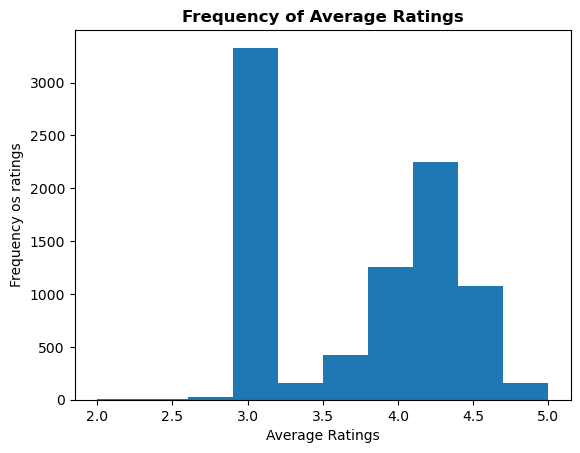

In [51]:
plt.hist(df['Avg ratings'])
plt.xlabel('Average Ratings')
plt.ylabel('Frequency os ratings')
plt.title('Frequency of Average Ratings',fontdict={'fontweight':'bold'})
plt.show()

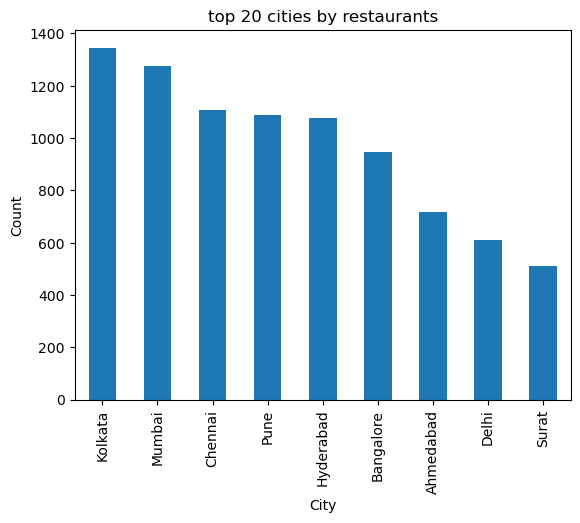

In [19]:
df["City"].value_counts().head(20).plot(kind="bar", xlabel="City", ylabel="Count", title="top 20 cities by restaurants")
plt.show()

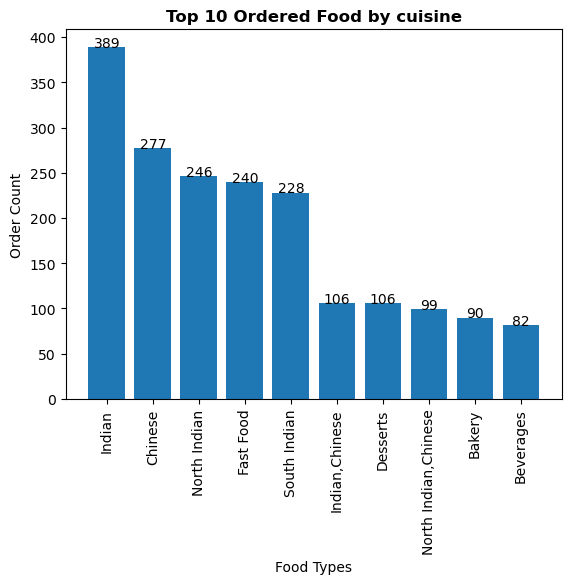

In [22]:
food=df['Food type'].value_counts().head(10)
plt.bar(food.index,food.values)

plt.xticks(rotation='vertical')

for i,v in enumerate(food.values):
    plt.text(i,v+.25,str(v),ha='center')

plt.title('Top 10 Ordered Food by cuisine',fontdict={'fontweight':'bold'})
plt.xlabel("Food Types")
plt.ylabel("Order Count")

plt.show()